## Matplotlib in detail
----

In this notebook we study Python's plotting library in more detail, making particular emphasis on the object oriented approach to plotting. All the material for this notebook can be found in: 

- Pandas 1.x Cookbook: Practical recipes for scientific computing, time series analysis, and exploratory data analysis using Python, 2nd Edition 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In the stateful interface, all functions are called on pyplot. Matplotlib keeps track internally of the current state of the plotting environment. 

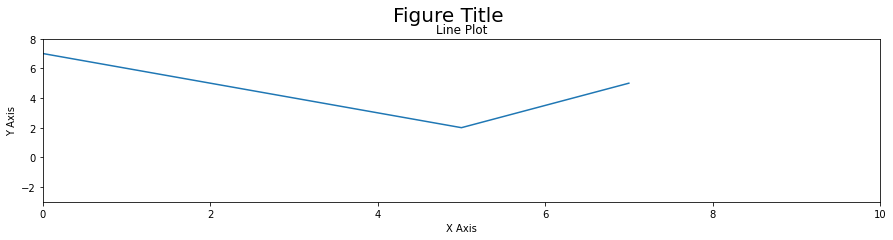

In [2]:
x = [-3, 5, 7]
y = [10, 2, 5]
plt.figure(figsize=(15, 3)) # Creating an instance of a figure
plt.plot(x, y)
plt.xlim(0, 10)
plt.ylim(-3, 8)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Line Plot')
plt.suptitle('Figure Title', size=20, y=1.03)
plt.show()

In the object-oriented interface, you explicitly use varaibles that make reference to specific plotting objects. Each variable is used to change some property of the plot.

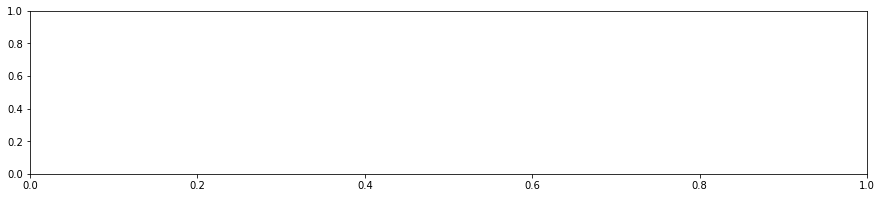

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))

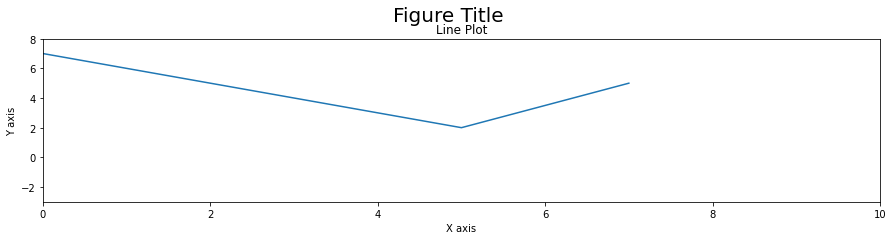

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 3))
# Adding plot to axes
ax.plot(x, y)
# Adding features to axes
ax.set(xlim=(0, 10), ylim=(-3, 8), 
       xlabel='X axis', ylabel='Y axis', 
       title='Line Plot')
# The figure is the canvas container
fig.suptitle('Figure Title', size=20, y=1.03)
plt.show()

Typically when using the object-oriented approach, we create a figure and one or more Axes objects. 

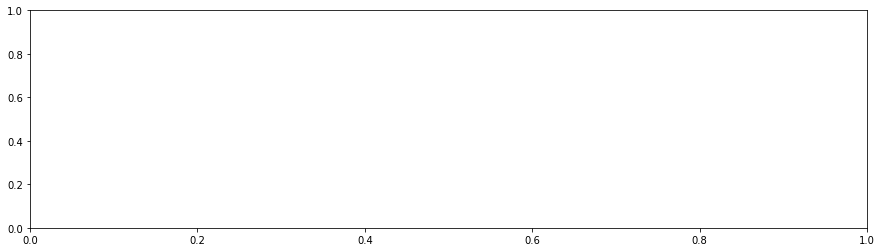

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 4))

In [7]:
print(type(fig))
print(type(ax))

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


We'll make use of getters and setters to interact with the object's attributes. 

In [8]:
fig.get_size_inches()

array([15.,  4.])

In [9]:
fig.set_size_inches(15, 6)

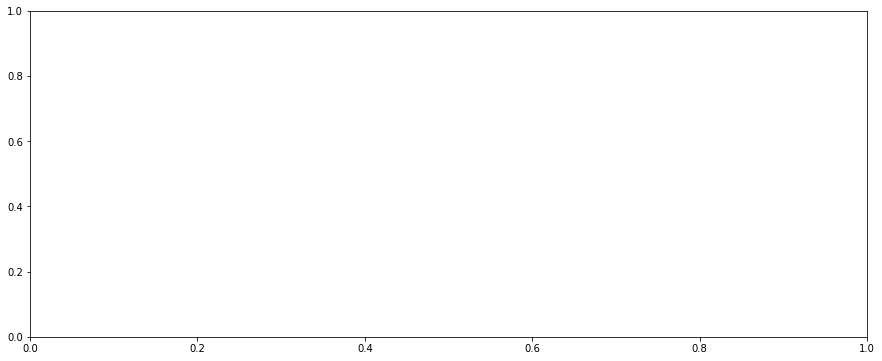

In [10]:
fig

In the matplotlib hierarchy, the figure containes the axes as attributes in an array. 

In [11]:
fig.axes

[<AxesSubplot:>]

The axes that we unpack in the subplots function make reference to these axes. 

In [13]:
fig.axes[0] is ax

True

In order to differentiate the axes from its figure, we can give them a different color. 

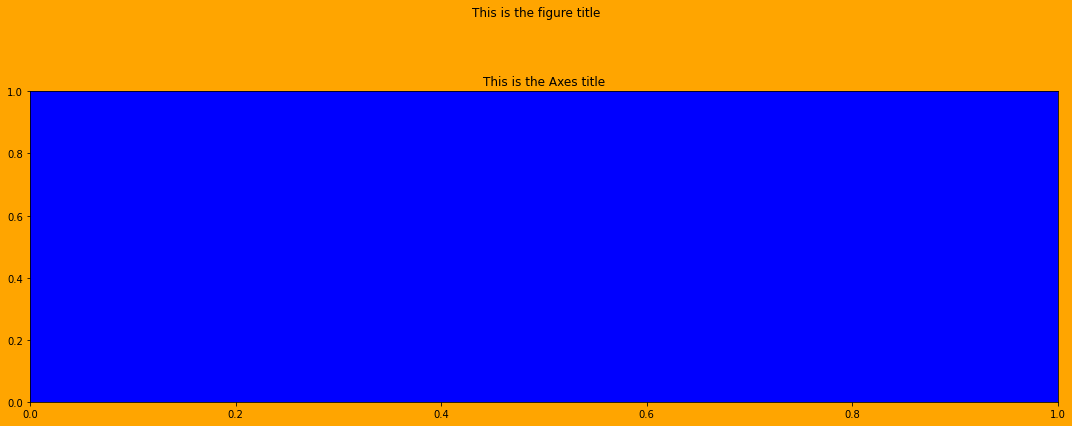

In [24]:
fig.set_facecolor('orange')
ax.set_facecolor('blue')
ax.set_title('This is the Axes title')
fig.suptitle('This is the figure title')
fig.tight_layout(rect=[0, 0, 1, .9])
fig

In [21]:
?fig.tight_layout

Let's take a look at the childs of the Axes object. 

In [25]:
ax_children = ax.get_children()
ax_children

 Text(0.5, 1.0, 'This is the Axes title'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

Most plots have four spines and two axis. The spines represent the data boundaries and are the physical lines bordering the blue region. We could access each within the array, but we can also access them via de `spines` attribute. 

In [26]:
spines = ax.spines
print(spines)

In [27]:
print(spines['left'] is ax.get_children()[0])

True


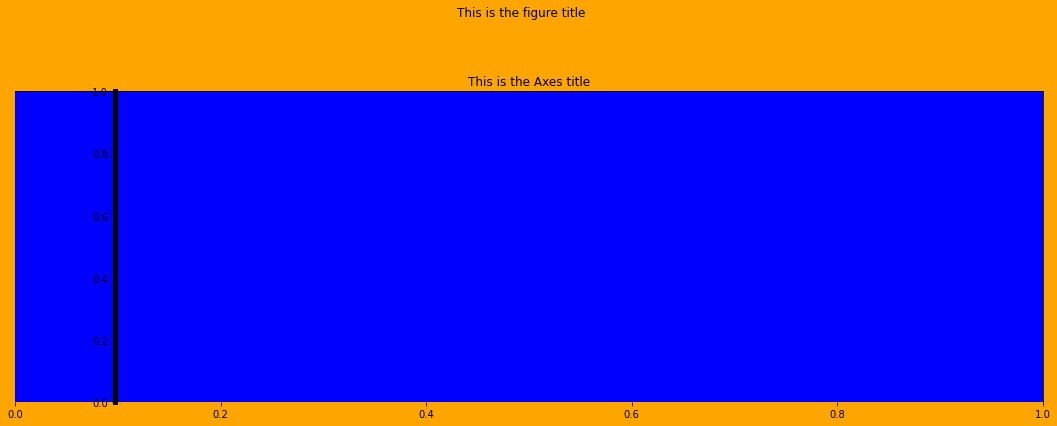

In [28]:
# Change position and width left
spine_left = spines['left']
spine_left.set_position(('outward', -100))
spine_left.set_linewidth(5)
spine_bottom = spines['bottom']
spine_bottom.set_visible(False)
fig

We can directly modify the axis through the ax object. 

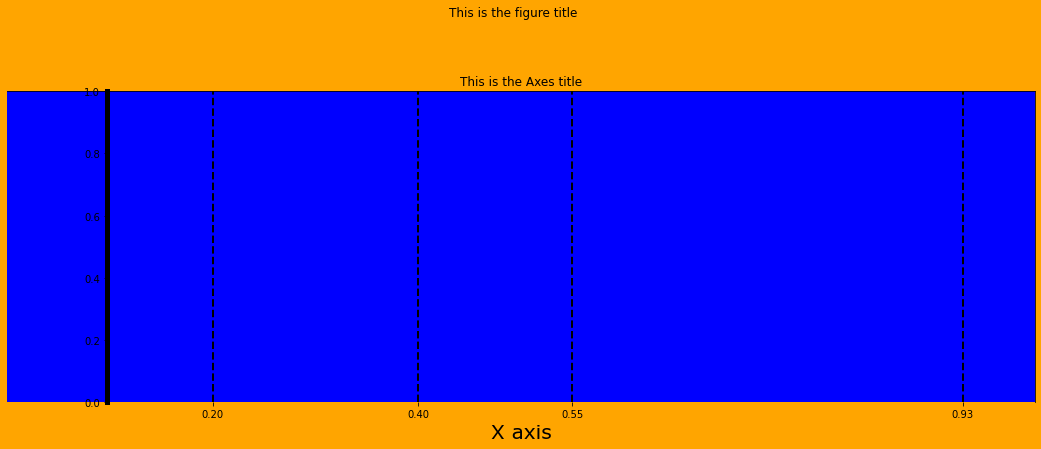

In [29]:
ax.xaxis.grid(True, which='major', 
              linewidth=2, color='black',
              linestyle='--'
             )
ax.xaxis.set_ticks([.2, .4, .55, .93])
ax.xaxis.set_label_text('X axis', family='Verdana', 
                        fontsize=20)
fig

Or directly from the Axes methods

findfont: Font family ['Gotham'] not found. Falling back to DejaVu Sans.


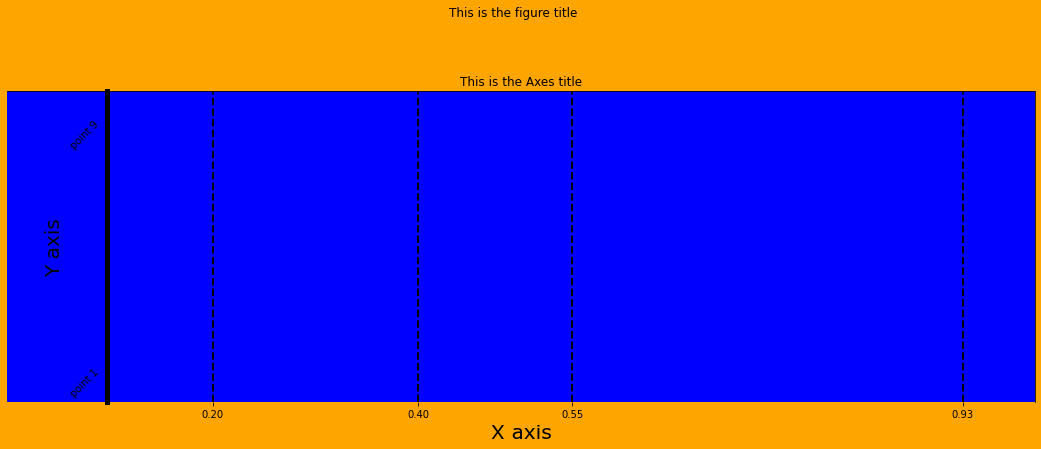

In [30]:
ax.set_yticks([.1, .9]) # ax.yaxis.set_t
ax.set_ylabel('Y axis', family='Gotham', fontsize=20)
ax.set_yticklabels(['point 1', 'point 9'], rotation=45)
fig

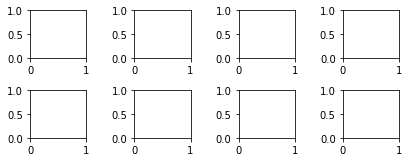

In [31]:
fig, axs = plt.subplots(2, 4)
fig.tight_layout(rect=[.01, .01, 1, .6])

In [32]:
fig.get_children()

 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>]

In [33]:
ax = axs[0][0]
fig.axes == fig.get_axes()

True

In [34]:
ax.xaxis == ax.get_xaxis()

True

In [35]:
ax.yaxis == ax.get_yaxis()

True

In [36]:
ax.xaxis.properties()

{'agg_filter': None,
 'alpha': None,
 'animated': False,
 'children': [Text(0.5, 82.75999999999999, ''),
  Text(1, 83.75999999999999, ''),
 'clip_box': <matplotlib.transforms.TransformedBbox at 0x7f7c30d89350>,
 'clip_on': True,
 'clip_path': None,
 'contains': None,
 'data_interval': array([ inf, -inf]),
 'figure': <Figure size 432x288 with 8 Axes>,
 'gid': None,
 'gridlines': <a list of 2 Line2D gridline objects>,
 'in_layout': True,
 'inverted': False,
 'label': Text(0.5, 82.75999999999999, ''),
 'label_position': 'bottom',
 'label_text': '',
 'major_formatter': <matplotlib.ticker.ScalarFormatter at 0x7f7c408cc510>,
 'major_locator': <matplotlib.ticker.AutoLocator at 0x7f7c50c23fd0>,
 'major_ticks': [<matplotlib.axis.XTick at 0x7f7c306e0bd0>,
 'majorticklabels': [Text(0.0, 0, '0'), Text(1.0, 0, '1')],
 'majorticklines': <a list of 4 Line2D ticklines objects>,
 'majorticklocs': array([0., 1.]),
 'minor_formatter': <matplotlib.ticker.NullFormatter at 0x7f7c408cc090>,
 'minor_locator':

Let us go through a more complex example.

In [37]:
alta = pd.read_csv('./data/alta-noaa-1980-2019.csv')

In [38]:
(alta
 .assign(DATE=pd.to_datetime(alta.DATE))
 .set_index('DATE')
 .loc['2018-09':'2019-08']
 .SNWD
).head()

DATE
2018-09-01    0.0
2018-09-02    0.0
2018-09-03    0.0
2018-09-04    0.0
2018-09-05    0.0
Name: SNWD, dtype: float64

In [39]:
data = (alta
       .assign(DATE=pd.to_datetime(alta.DATE))
       .set_index('DATE')
       .loc['2018-09':'2019-08']
       .SNWD)

In [40]:
data

DATE
2018-09-01    0.0
2018-09-02    0.0
2018-09-03    0.0
2018-09-04    0.0
2018-09-05    0.0
             ... 
2019-08-27    0.0
2019-08-28    0.0
2019-08-29    0.0
2019-08-30    0.0
2019-08-31    0.0
Name: SNWD, Length: 364, dtype: float64

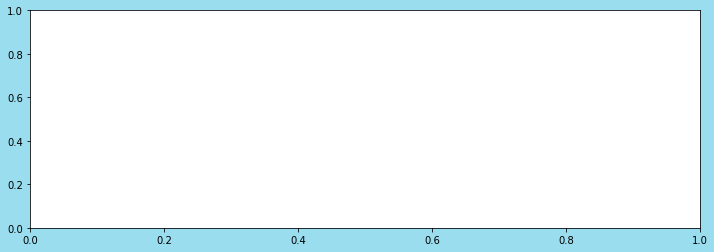

In [41]:
blue='#99ddee'
white='#ffffff'
fig, ax = plt.subplots(figsize=(12, 4), 
                       linewidth=5, 
                       facecolor=blue)

Remove spines and set Axes facecolor

In [42]:
ax.set_facecolor(blue)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

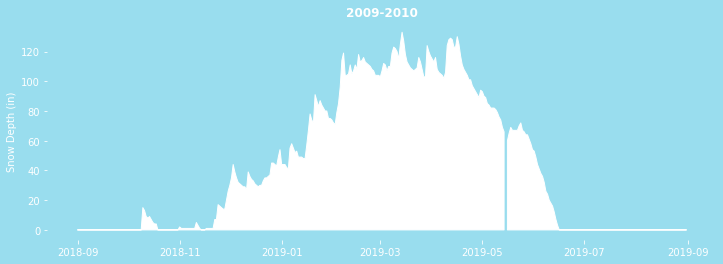

In [43]:
ax.xaxis.set_tick_params(colors=white)  # Using xaxis!!! Axes son
ax.tick_params(axis='y', colors=white)  # Using Axes directly
ax.set_ylabel('Snow Depth (in)', color=white)
ax.set_title('2009-2010', color=white, fontweight='bold')
ax.fill_between(data.index, data, color=white)
fig

In [44]:
import matplotlib.dates as mdt  # For working with dates

In [48]:
def plot_year(ax, data, years):
    ax.set_facecolor(blue)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(axis='x', colors=white)
    ax.tick_params(axis='y', colors=white)
    ax.set_ylabel('Snow Depth (in)', color=white)
    ax.set_title(years, color = white, fontweight='bold')
    ax.fill_between(data.index, data, color=white)

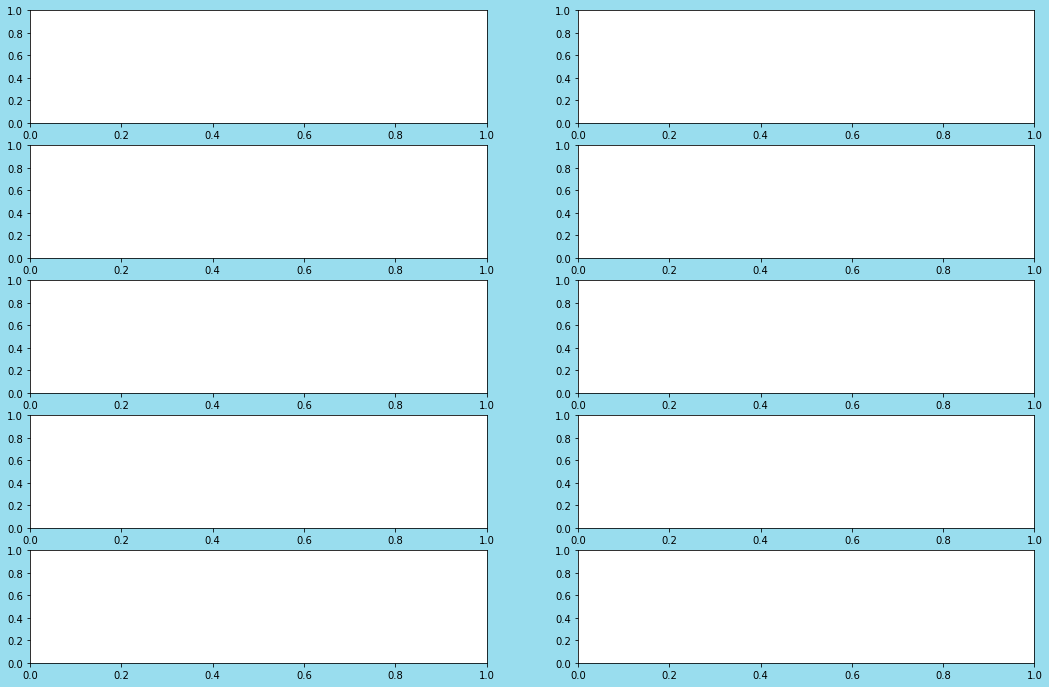

In [49]:
years = range(2009, 2019)
fig, axs = plt.subplots(ncols=2, nrows=(int(len(years)/2)), 
                        figsize=(18, 12), linewidth=5, 
                        facecolor=blue)

In [50]:
axs.flatten()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [51]:
axs = axs.flatten()
max_val = None
max_data = None
max_ax = None
for i, y in enumerate(years):
    ax = axs[i]
    data = (alta
           .assign(DATE=pd.to_datetime(alta.DATE))
           .set_index('DATE')
           .loc[f'{y}-09':f'{y+1}-08']
           .SNWD)
    #if max_val is None or max_val < data.max():
    max_val = data.max()
    max_data = data
    ax.annotate(f'Max Snow {max_val}', 
                xy=(mdt.date2num(max_data.idxmax()), 
                    max_val), 
                xytext=(mdt.date2num(max_data.idxmax()) + 15, 
                        max_val + 50),
                arrowprops={'color':'white'},
                color=white)
    ax.set_ylim(0, 180)
    years=f'{y}-{y+1}'
    plot_year(ax, data, years)

In [52]:
fig.suptitle('Alta Snowfall', 
             color=white,
             fontweight='bold',
             ha='center')
fig.tight_layout(rect=[0, 0, 1, .95])

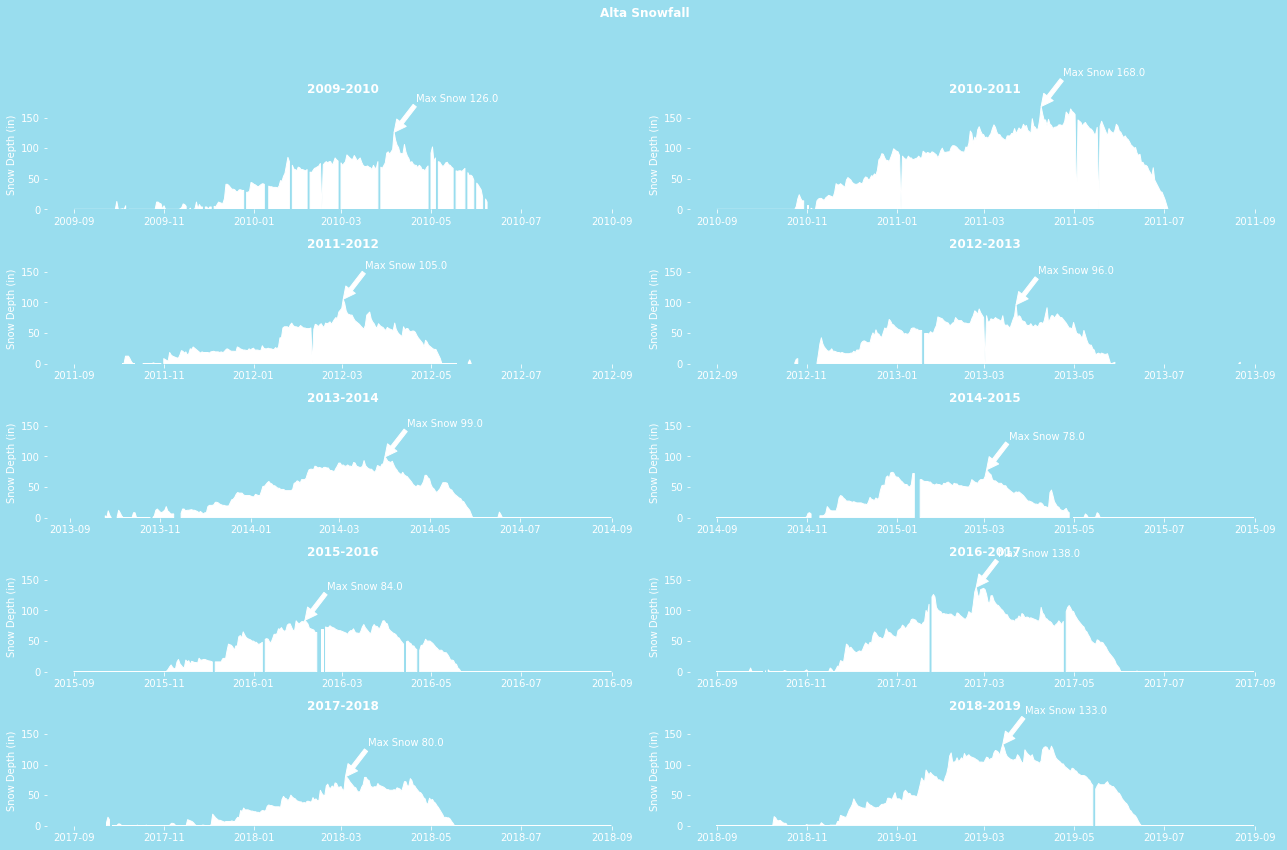

In [53]:
fig

By taking a look at the data, we can see that some entries are missing, we can fix this by using the Series method interpolate. 

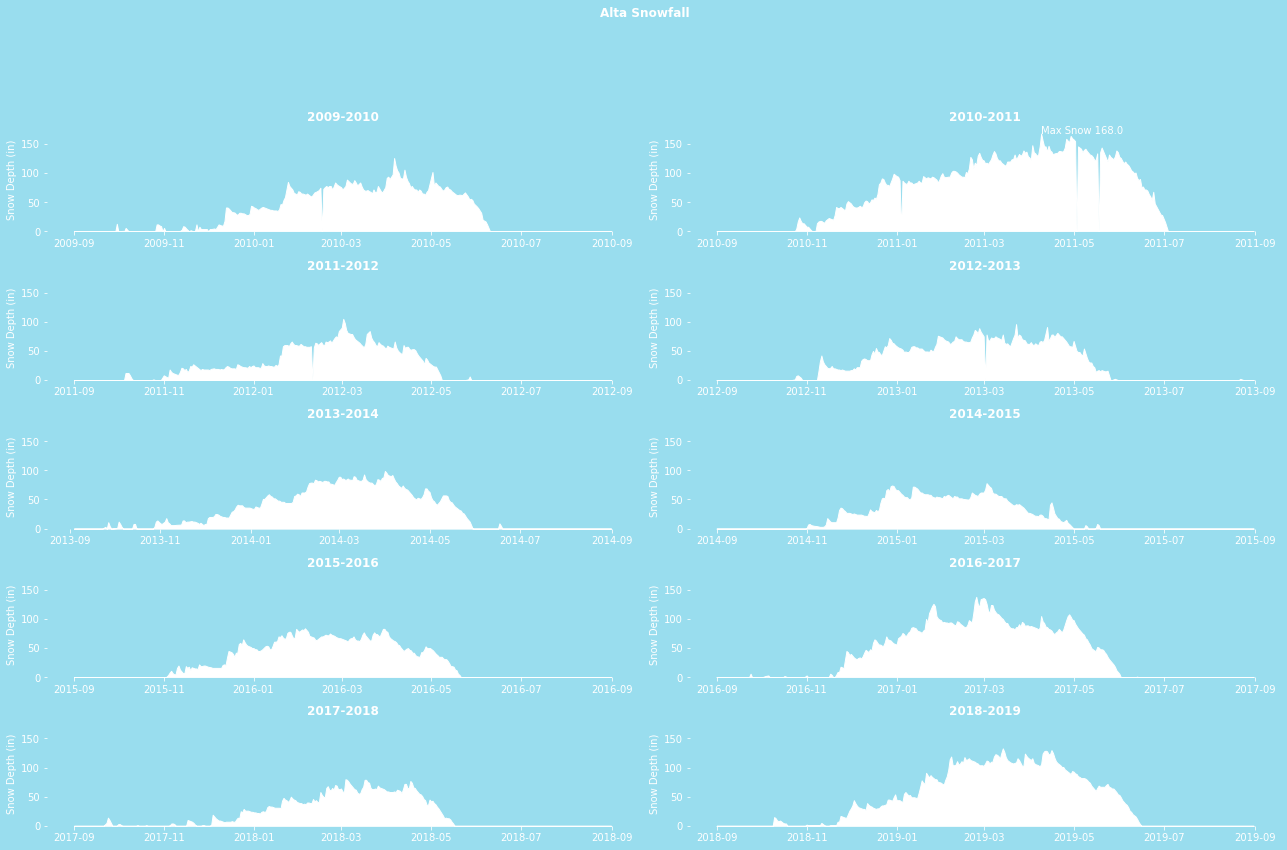

In [55]:
years = range(2009, 2019)
fig, axs = plt.subplots(ncols=2, nrows=(int(len(years)/2)), 
                        figsize=(18, 12), linewidth=5, 
                        facecolor=blue)

axs = axs.flatten()
max_val = None
max_data = None
max_ax = None
for i, y in enumerate(years):
    ax = axs[i]
    data = (alta
            .assign(DATE=pd.to_datetime(alta.DATE))
            .set_index('DATE')
            .loc[f'{y}-09':f'{y+1}-08']
            .SNWD
            .interpolate()) # Interpolate for missing values
    if max_val is None or max_val < data.max():
        max_val = data.max()
        max_data = data
        max_ax = ax
    ax.set_ylim(0, 180)
    years=f'{y}-{y+1}'
    plot_year(ax, data, years)
# Annotate the maximum
max_ax.annotate(f'Max Snow {max_val}', 
               xy=(mdt.date2num(max_data.idxmax()), 
                  max_val), color=white)
# Add title to figure
fig.suptitle('Alta Snowfall', 
             color=white,
             fontweight='bold', 
             ha='center')
fig.tight_layout(rect=[0, 0, 1, .9])

### Plotting basics with pandas

In [56]:
df = pd.DataFrame(index=['Atiya', 'Abbas', 'Cornelia', 'STephanie', 'Monte'],
                  data={'Apples': [20, 10, 40, 20, 50], 
                        'Oranges': [35, 40, 25, 19, 33]})
df

,Apples,Oranges
Atiya,20,35
Abbas,10,40
Cornelia,40,25
STephanie,20,19
Monte,50,33


Bar plot uses index and plots different columns in different colors.

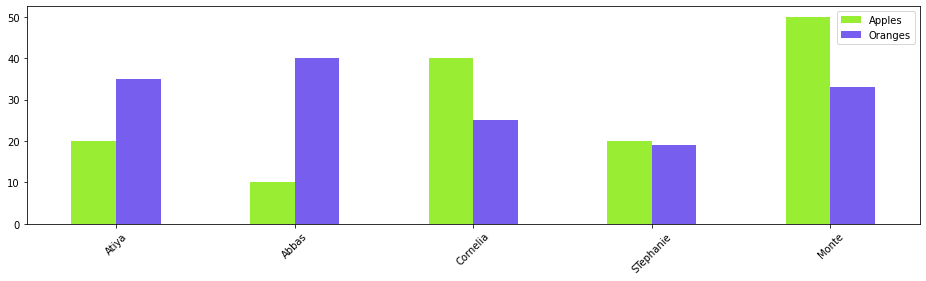

In [57]:
color = ['#99EE33', '#775EEE']
ax = df.plot.bar(color=color, figsize=(16, 4))
ax.xaxis.set_ticklabels(df.index, rotation=45)
plt.show()

KDE plot ignores index, columns vs probability estimates

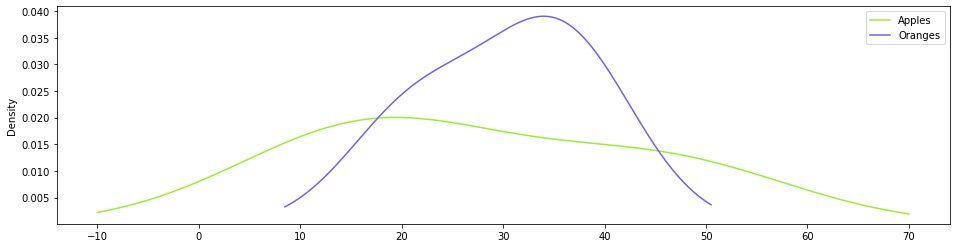

In [58]:
ax = df.plot.kde(color=color, figsize=(16, 4))

Multiple subplots

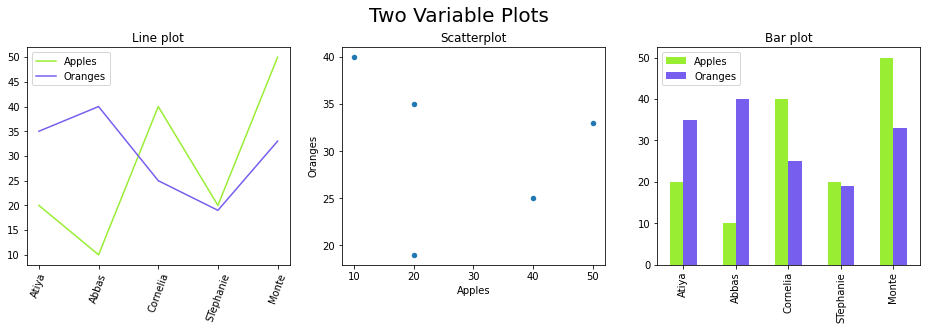

In [59]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('Two Variable Plots', size=20, y=1.02)
# Line plot uses index as x coordinate for all columns
df.plot.line(ax=ax1, color=color, title='Line plot')
ax1.xaxis.set_ticklabels(ax1.xaxis.get_ticklabels(), rotation=70)
# Scatter plot needs to specify the two columns
df.plot.scatter(x='Apples', y='Oranges', ax=ax2, title='Scatterplot')
# Bar plot uses index as x coordinate for all columns
df.plot.bar(ax=ax3, color=color, title='Bar plot')
plt.show()

In [89]:
df.index

Index(['Atiya', 'Abbas', 'Cornelia', 'STephanie', 'Monte'], dtype='object')

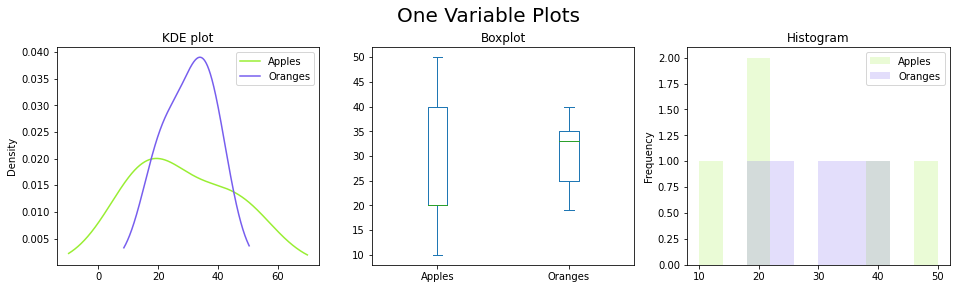

In [60]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
fig.suptitle('One Variable Plots', size=20, y=1.02)
df.plot.kde(color=color, ax=ax1, title='KDE plot')
df.plot.box(ax=ax2, title='Boxplot')
df.plot.hist(color=color, ax=ax3, title='Histogram', alpha=.2)
plt.show()

Ofcourse, you can specify what to plot against what.

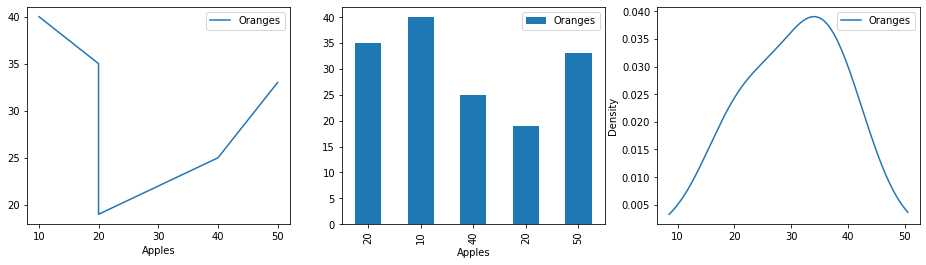

In [61]:
fig, (ax1, ax2, ax3)=plt.subplots(1, 3, figsize=(16, 4))
df.sort_values('Apples').plot.line(x='Apples', y='Oranges', ax=ax1)
df.plot.bar(x='Apples', y='Oranges', ax=ax2)
df.plot.kde(x='Apples', ax=ax3)
plt.show()

In [62]:
flights = pd.read_csv('./data/flights.csv')
flights

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58487,12,31,4,AA,SFO,DFW,515,5.0,166.0,1464,1045,-19.0,0,0
58488,12,31,4,F9,LAS,SFO,1910,13.0,71.0,414,2050,4.0,0,0
58489,12,31,4,OO,SFO,SBA,1846,-6.0,46.0,262,1956,-5.0,0,0
58490,12,31,4,WN,MSP,ATL,525,39.0,124.0,907,855,34.0,0,0


In [63]:
flights['ARR_DELAY'].ge(15).astype(int)

0        1
1        0
2        1
3        0
4        1
        ..
58487    0
58488    0
58489    0
58490    1
58491    0
Name: ARR_DELAY, Length: 58492, dtype: int64

In [64]:
cols = ['DIVERTED', 'CANCELLED', 'DELAYED']
(flights
 .assign(
     DELAYED=flights['ARR_DELAY'].ge(15).astype(int), 
     ON_TIME=lambda df_: 1 - df_[cols].any(axis=1))
 .select_dtypes(int)
 .sum()
)

MONTH          363858
DAY            918447
WEEKDAY        229690
SCHED_DEP    81186009
DIST         51057671
SCHED_ARR    90627495
DIVERTED          137
CANCELLED         881
DELAYED         11685
ON_TIME         45789
dtype: int64

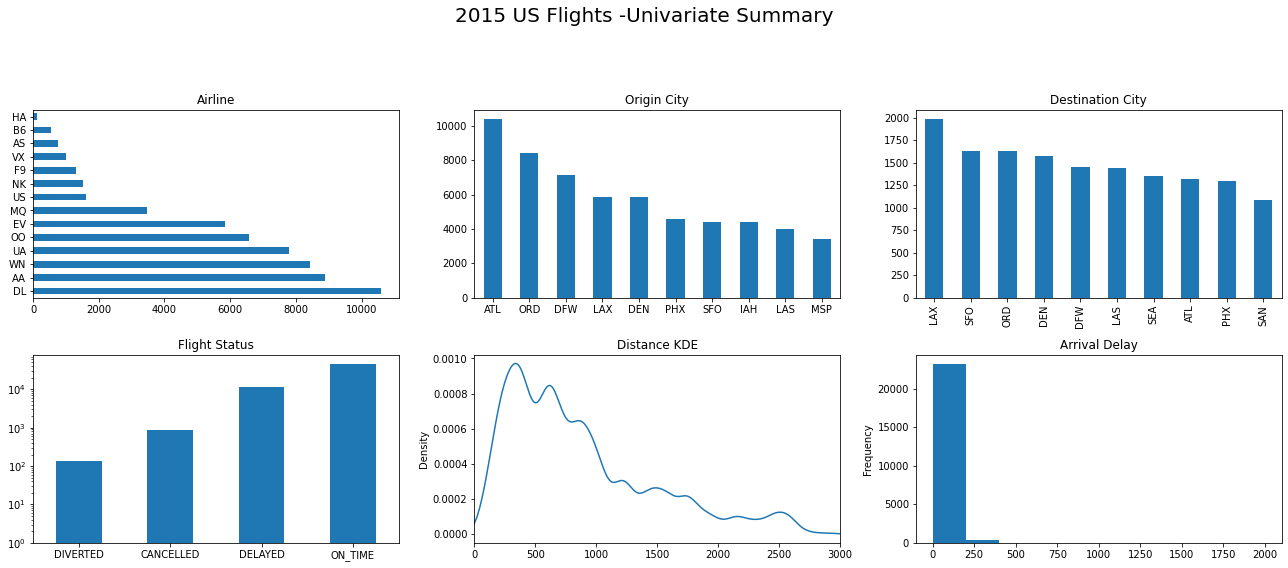

In [65]:
fig, ax_array = plt.subplots(2, 3, figsize=(18, 8))
(ax1, ax2, ax3), (ax4, ax5, ax6) = ax_array
fig.suptitle('2015 US Flights -Univariate Summary', size=20)
# Horizontal plot of airlines
ac = flights['AIRLINE'].value_counts()
ac.plot.barh(ax=ax1, title='Airline')
# Bar plot of origins
(flights['ORG_AIR'].value_counts().plot.bar(ax=ax2, rot=0, title='Origin City'))
# Bar plot of ten destinations
(flights['DEST_AIR'].value_counts().head(10).plot.bar(ax=ax3, title='Destination City'))
# Bar plot of delays
(flights.assign(DELAYED=flights['ARR_DELAY'].ge(15).astype(int), 
                ON_TIME=lambda df_: 1 - df_[cols].any(axis=1))
 [['DIVERTED', 'CANCELLED', 'DELAYED', 'ON_TIME']]
 .sum()
 .plot.bar(ax=ax4, rot=0, log=True, title='Flight Status')
)
# KDE of distances
flights['DIST'].plot.kde(ax=ax5, xlim=(0, 3000), title='Distance KDE')
# Bar plot array delay
flights['ARR_DELAY'].plot.hist(ax=ax6, title='Arrival Delay', 
                              range=(0, 2000))
fig.tight_layout(rect=[0, 0, 1, .9])

This seems like the ideal place for using timeseries analysis. In order to do so, we can use some of the `to_date` functionalities to extract a date from date componentes that are spread through multiple columns. 

In [66]:
flights.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


In [67]:
df_date = (flights[['MONTH', 'DAY']].assign(YEAR=2015, 
                                            HOUR=flights['SCHED_DEP']//100, 
                                            MINUTE=flights['SCHED_DEP'] % 100
                                           ))
pd.to_datetime(df_date.head())

0   2015-01-01 16:25:00
1   2015-01-01 08:23:00
2   2015-01-01 13:05:00
3   2015-01-01 15:55:00
4   2015-01-01 17:20:00
dtype: datetime64[ns]

In [68]:
df_date = (flights[['MONTH', 'DAY']].assign(YEAR=2015, 
                                            HOUR=flights['SCHED_DEP']//100, 
                                            MINUTE=flights['SCHED_DEP'] % 100
                                           ))
flight_dep = pd.to_datetime(df_date)
flight_dep.head()

0   2015-01-01 16:25:00
1   2015-01-01 08:23:00
2   2015-01-01 13:05:00
3   2015-01-01 15:55:00
4   2015-01-01 17:20:00
dtype: datetime64[ns]

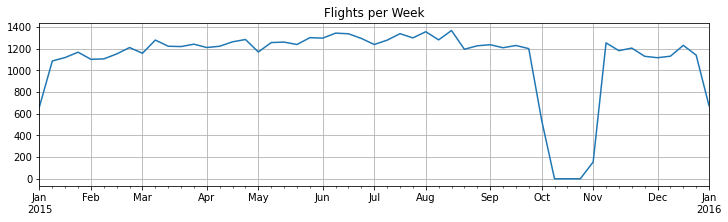

In [69]:
# Another advantage of having a datetime object as index
flights.index = flight_dep
fc = flights.resample('W').size()
fc.plot.line(figsize=(12, 3), title='Flights per Week', grid=True)
fig.savefig('./images/c13-ts1.png')

We can see that there is information missing for October, as well as incomplete weeks at the begining and end of the timeseries due to incomplete weeks. Let's label any week with less than 600 observations as missing and then use interpolation method. 

In [70]:
fc.head()

2015-01-04     666
2015-01-11    1088
2015-01-18    1120
2015-01-25    1169
2015-02-01    1103
Freq: W-SUN, dtype: int64

/Users/luis/anaconda3/envs/nlu/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  app.launch_new_instance()


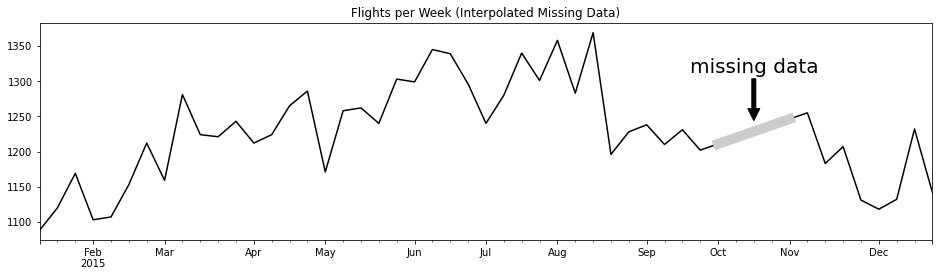

In [71]:
def interp_lt_n(df_, n=600):
    return (df_
            .where(df_ > n)
            .interpolate(limit_direction='both'))

fig, ax = plt.subplots(figsize=(16, 4))
fc.pipe(interp_lt_n).iloc[1:-1].plot.line(color='black', ax=ax)
mask = fc < 600
fc.pipe(interp_lt_n)[mask].plot.line(color='.8', linewidth=10)
ax.annotate(xy=(.8, .55), 
            xytext=(.8, .77), 
            xycoords='axes fraction', 
            s='missing data', 
            ha='center',
            size=20,
            arrowprops={'color':'black'})
ax.set_title('Flights per Week (Interpolated Missing Data)')
fig.savefig('./images/c13-ts2.png')

Let us work with a more multivariate approach and find the 10 airports that: 

- Have the longest distance traveled for inbound flights
- Have a minimum of 100 total flights. 

In [75]:
(flights
 .groupby('DEST_AIR')
 .agg(mean_air_time=pd.NamedAgg('DIST', np.mean),      
      count=pd.NamedAgg('DIST', np.sum))
)

,mean_air_time,count
DEST_AIR,,
ABE,675.563636,37156
ABI,158.000000,11692
ABQ,599.341108,205574
ABR,257.000000,4883
ABY,145.000000,2755
...,...,...
TYS,516.263415,105834
VLD,208.000000,4784
VPS,441.086331,61311


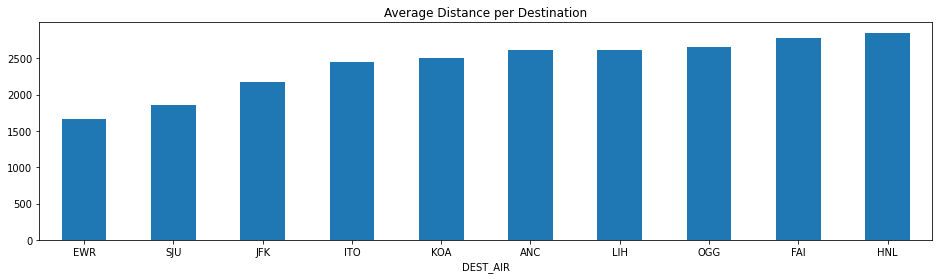

In [78]:
fig, ax = plt.subplots(figsize=(16, 4))
(flights
 .groupby('DEST_AIR')
 .agg(mean_dist=pd.NamedAgg('DIST', aggfunc=lambda x: np.mean(x)),
      count=pd.NamedAgg('DIST', aggfunc=lambda x: np.sum(x)))
 .query('count > 100')
 .sort_values('mean_dist')
 .tail(10)
 .plot.bar(y='mean_dist', rot=0, legend=False, ax=ax, title='Average Distance per Destination')
)
fig.savefig('./images/c13-bar1.png')

Now let's study the relation between airtime and distance for flights under 2000 miles. 

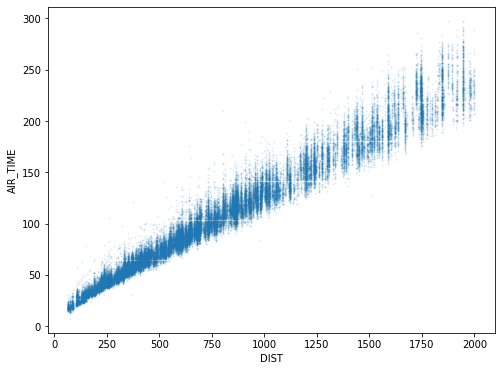

In [79]:
fig, ax = plt.subplots(figsize=(8, 6))
(flights
 .reset_index(drop=True)
 [['DIST', 'AIR_TIME']]
 .query('DIST <= 2000')
 .dropna()
 .plot.scatter(x='DIST', y='AIR_TIME', ax=ax, alpha=.1, s=1)
)
fig.savefig('./images/c13-scat1.png')

There seems to be a linear relation, though the variance seems to increase with the distance. 

In [80]:
flights[['DIST', 'AIR_TIME']].corr()

,DIST,AIR_TIME
DIST,1.00000,0.98774
AIR_TIME,0.98774,1.00000


Let's try to identify the flights that are outside the trendline. 

In [81]:
(flights
 .reset_index(drop=True)
 [['DIST', 'AIR_TIME']]
 .query('DIST <= 2000')
 .dropna()
 .pipe(lambda df_: pd.cut(df_.DIST, bins=range(0, 2001, 250)))
 .value_counts()
 .sort_index()
)

(0, 250]         6529
(250, 500]      12631
(500, 750]      11506
(750, 1000]      8832
(1000, 1250]     5071
(1250, 1500]     3198
(1500, 1750]     3885
(1750, 2000]     1815
Name: DIST, dtype: int64

Here we are assuming that each flight within a group should have a similar flight time.

In [82]:
short = (flights
         [['DIST', 'AIR_TIME']]
         .query('DIST <= 2000')
         .dropna()
         .reset_index(drop=True)
         .assign(BIN=lambda df_: pd.cut(df_.DIST, bins=range(0, 2001, 250)))
         .assign(SCORE=lambda df_: df_.groupby('BIN')['AIR_TIME'].transform(lambda x: (x - x.mean())/x.std()))
        )
short

,DIST,AIR_TIME,BIN,SCORE
0,590,94.0,"(500, 750]",0.490966
1,1452,154.0,"(1250, 1500]",-1.267551
2,641,85.0,"(500, 750]",-0.296749
3,1192,126.0,"(1000, 1250]",-1.211020
4,1363,166.0,"(1250, 1500]",-0.521999
...,...,...,...,...
53462,1464,166.0,"(1250, 1500]",-0.521999
53463,414,71.0,"(250, 500]",1.376879
53464,262,46.0,"(250, 500]",-1.255719
53465,907,124.0,"(750, 1000]",0.495005


We can create a box plot for this data. To do this, we need to have the bin as a column name, so we pivot through the BIN column.

In [83]:
short.pivot(columns='BIN')['SCORE']

BIN,"(0, 250]","(250, 500]","(500, 750]","(750, 1000]","(1000, 1250]","(1250, 1500]","(1500, 1750]","(1750, 2000]"
0,NaN,NaN,0.490966,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,-1.267551,NaN,NaN
2,NaN,NaN,-0.296749,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,-1.21102,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,-0.521999,NaN,NaN
...,...,...,...,...,...,...,...,...
53462,NaN,NaN,NaN,NaN,NaN,-0.521999,NaN,NaN
53463,NaN,1.376879,NaN,NaN,NaN,NaN,NaN,NaN
53464,NaN,-1.255719,NaN,NaN,NaN,NaN,NaN,NaN
53465,NaN,NaN,NaN,0.495005,NaN,NaN,NaN,NaN


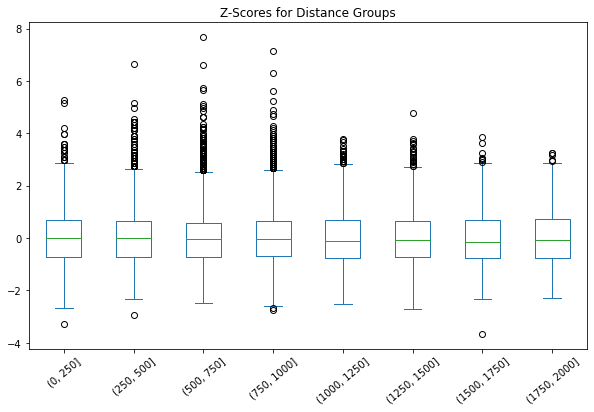

In [84]:
fig, ax = plt.subplots(figsize=(10, 6))
(short.pivot(columns='BIN')['SCORE'].plot.box(ax=ax, rot=40))
ax.set_title('Z-Scores for Distance Groups')
fig.savefig('./images/c13-box2.png')

In [85]:
mask = (short.pipe(lambda df_: df_.SCORE.abs() > 6))
outliers = (flights
            [['DIST', 'AIR_TIME']]
            .query('DIST <= 2000')
            .dropna()
            .reset_index(drop=True)
            [mask]
            .assign(PLOT_NUM=lambda df_: range(1, len(df_) + 1))
           )

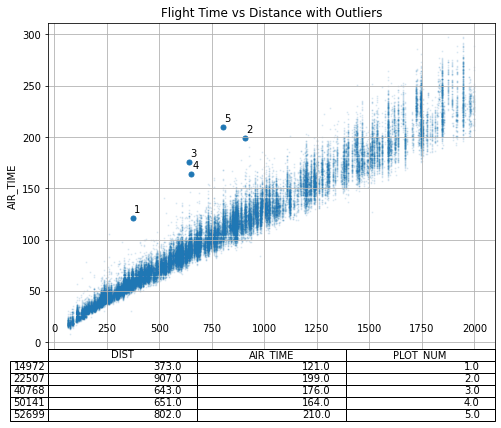

In [86]:
fig, ax = plt.subplots(figsize=(8, 6))
(short.plot.scatter(x='DIST', y='AIR_TIME', alpha=.1, s=1, ax=ax, table=outliers))
outliers.plot.scatter(x='DIST', y='AIR_TIME',s=25, ax=ax, grid=True)
outs = outliers[['AIR_TIME', 'DIST', 'PLOT_NUM']]
for t, d, n in outs.itertuples(index=False):
    ax.text(d+5, t+5, str(n))
plt.setp(ax.get_xticklabels(), y=.1)
plt.setp(ax.get_xticklines(), visible=False)
ax.set_xlabel('')
ax.set_title('Flight Time vs Distance with Outliers')
fig.savefig('c13-scat3.png', dpi=300, bbox_inches='tight')

### Stacked area charts

Stacked area charts are great for discovering emerging trends. 

In [ ]:
 ## parse_dates=['join_date'], index_col='Join_date'

In [87]:
meetup = pd.read_csv('./data/meetup_groups.csv')
meetup = meetup.assign(join_date=pd.to_datetime(meetup.join_date)).set_index('join_date')

In [88]:
meetup.head()

,group,city,state,country
join_date,,,,
2016-11-18 02:41:29,houston machine learning,Houston,TX,us
2017-05-09 14:16:37,houston machine learning,Houston,TX,us
2016-12-30 02:34:16,houston machine learning,Houston,TX,us
2016-07-18 00:48:17,houston machine learning,Houston,TX,us
2017-05-25 12:58:16,houston machine learning,Houston,TX,us


Let's take a look at the number of people who joined each group each week

In [89]:
(meetup.groupby([pd.Grouper(freq='W'), 'group']).size())

join_date   group                       
2010-11-07  houstonr                         5
2010-11-14  houstonr                        11
2010-11-21  houstonr                         2
2010-12-05  houstonr                         1
2011-01-16  houstonr                         2
                                            ..
2017-10-15  houston data science            14
            houston data visualization      13
            houston energy data science      9
            houston machine learning        11
            houstonr                         2
Length: 763, dtype: int64

This tells us the number of new members that entered each particular group.

In [90]:
(meetup.groupby([pd.Grouper(freq='W'), 'group']).size().unstack('group', fill_value=0))

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2010-11-07,0,0,0,0,5
2010-11-14,0,0,0,0,11
2010-11-21,0,0,0,0,2
2010-12-05,0,0,0,0,1
2011-01-16,0,0,0,0,2
...,...,...,...,...,...
2017-09-17,16,2,6,5,0
2017-09-24,19,4,16,12,7
2017-10-01,20,6,6,20,1


Let's extract the global count of new members

In [91]:
(meetup.groupby([pd.Grouper(freq='W'), 'group']).size().unstack('group', fill_value=0).cumsum())

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2010-11-07,0,0,0,0,5
2010-11-14,0,0,0,0,16
2010-11-21,0,0,0,0,18
2010-12-05,0,0,0,0,19
2011-01-16,0,0,0,0,21
...,...,...,...,...,...
2017-09-17,2105,1708,1886,708,1056
2017-09-24,2124,1712,1902,720,1063
2017-10-01,2144,1718,1908,740,1064


Let's make each row add up to one

In [92]:
(meetup
 .groupby([pd.Grouper(freq='W'), 'group'])
 .size()
 .unstack('group', fill_value=0)
 .cumsum()
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
)

group,houston data science,houston data visualization,houston energy data science,houston machine learning,houstonr
join_date,,,,,
2010-11-07,0.000000,0.000000,0.000000,0.000000,1.000000
2010-11-14,0.000000,0.000000,0.000000,0.000000,1.000000
2010-11-21,0.000000,0.000000,0.000000,0.000000,1.000000
2010-12-05,0.000000,0.000000,0.000000,0.000000,1.000000
2011-01-16,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...
2017-09-17,0.282058,0.228862,0.252713,0.094868,0.141498
2017-09-24,0.282409,0.227629,0.252892,0.095732,0.141338
2017-10-01,0.283074,0.226829,0.251914,0.097703,0.140481


Now we are ready to create our stacked area plot


/Users/luis/anaconda3/envs/nlu/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  
/Users/luis/anaconda3/envs/nlu/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  from ipykernel import kernelapp as app
/Users/luis/anaconda3/envs/nlu/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  app.launch_new_instance()
/Users/luis/anaconda3/envs/nlu/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 's' parameter of annotate() h

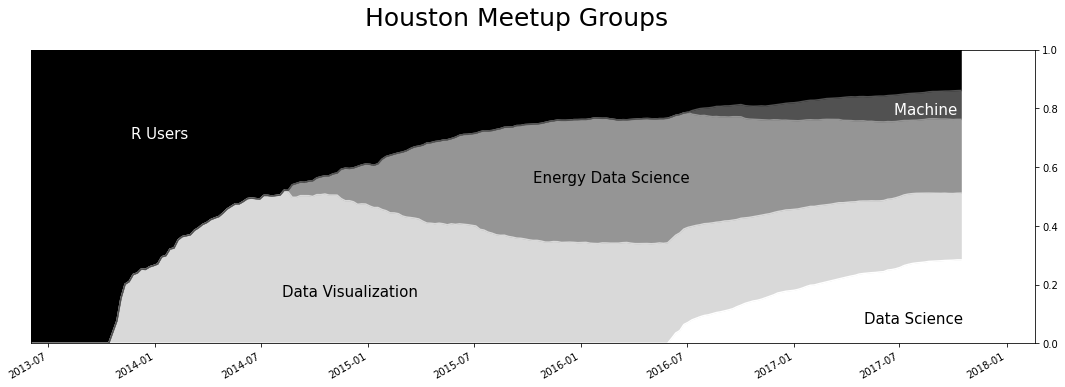

In [93]:
fig, ax = plt.subplots(figsize=(18, 6))
(meetup
 .groupby([pd.Grouper(freq='W'), 'group'])
 .size()
 .unstack('group', fill_value=0)
 .cumsum()
 .pipe(lambda df_: df_.div(df_.sum(axis=1), axis=0))
 .plot.area(ax=ax, cmap='Greys', xlim=('2013-6', None), ylim=(0, 1), legend=False)
)
ax.figure.suptitle('Houston Meetup Groups', size=25)
ax.set_xlabel('')
ax.yaxis.tick_right()
kwargs={'xycoords': 'axes fraction', 'size':15}
ax.annotate(xy=(.1, .7), s='R Users', color='w', **kwargs)
ax.annotate(xy=(.25, .16), s='Data Visualization', color='k', **kwargs)
ax.annotate(xy=(.5, .55), s='Energy Data Science', color='k', **kwargs)
ax.annotate(xy=(.83, .07), s='Data Science', color='k', **kwargs)
ax.annotate(xy=(.86, .78), s='Machine Learning', color='w', **kwargs)
fig.savefig('./images/c13-stacked1.png')

### Seaborn

In [94]:
import seaborn as sns

employee = pd.read_csv('./data/employee.csv', parse_dates=['HIRE_DATE', 'JOB_DATE'])
employee

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,HIRE_DATE,JOB_DATE
0,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2006-06-12,2012-10-13
1,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2000-07-19,2010-09-18
2,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03,2015-02-03
3,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1982-02-08,1991-05-25
4,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1989-06-19,1994-10-22
...,...,...,...,...,...,...,...,...,...,...
1995,1995,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-06-09,2015-06-09
1996,1996,COMMUNICATIONS CAPTAIN,Houston Fire Department (HFD),66523.0,Black or African American,Full Time,Male,Active,2003-09-02,2013-10-06
1997,1997,POLICE OFFICER,Houston Police Department-HPD,43443.0,White,Full Time,Male,Active,2014-10-13,2015-10-13
1998,1998,POLICE OFFICER,Houston Police Department-HPD,55461.0,Asian/Pacific Islander,Full Time,Male,Active,2009-01-20,2011-07-02


Let's make a bar chart of the count of each department

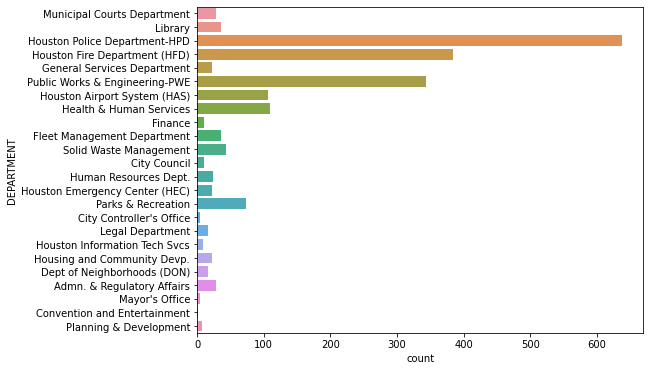

In [95]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(y='DEPARTMENT', data=employee, ax=ax)
fig.savefig('./images/c13-sns1.png', dpi=300, bbox_inches='tight')

To reproduce this graph with pandas we would have to aggregate the data beforehand

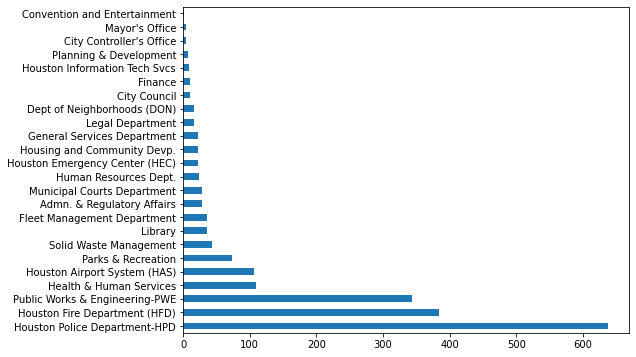

In [96]:
fig, ax = plt.subplots(figsize=(8, 6))
employee['DEPARTMENT'].value_counts().plot.barh(ax=ax)
fig.savefig('./images/c13-sns2.png', dpi=300, bbox_inches='tight')


Average salary per race

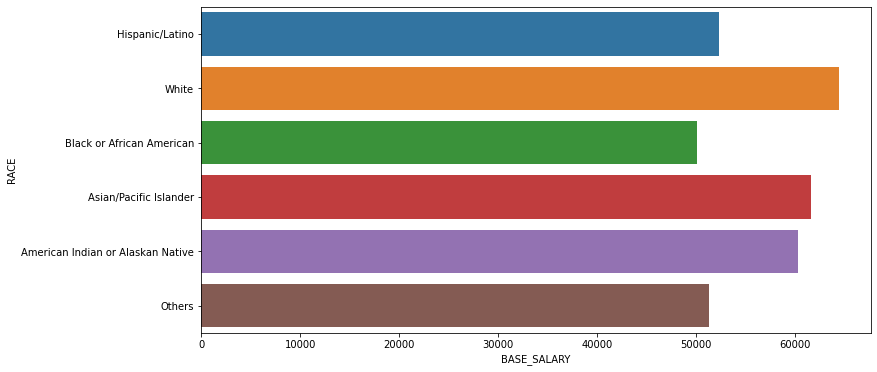

In [97]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(y='RACE', x='BASE_SALARY', data=employee, ax=ax, ci=None)
plt.show()

<AxesSubplot:ylabel='RACE'>

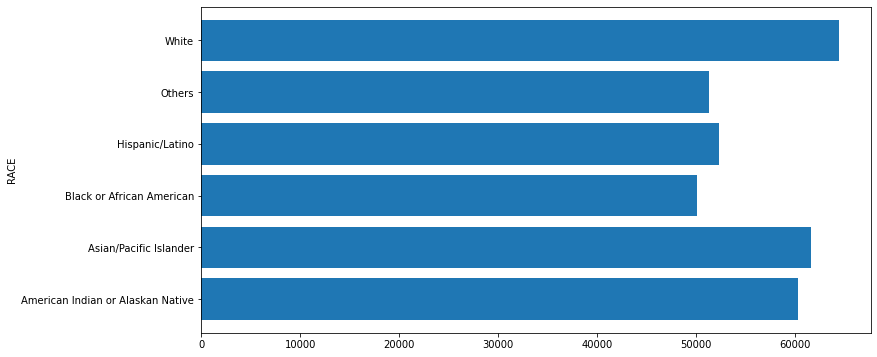

In [98]:
fig, ax = plt.subplots(figsize=(12, 6))
employee.groupby('RACE')['BASE_SALARY'].mean().plot.barh(ax=ax, width=.8)

Seaborn has the ability to distinguish groups of a variable using hue. 

<AxesSubplot:xlabel='RACE', ylabel='BASE_SALARY'>

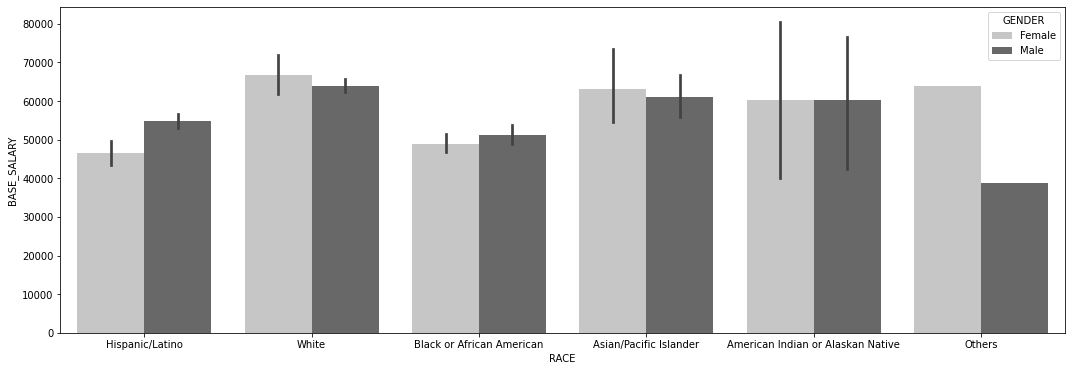

In [99]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='RACE', y='BASE_SALARY', hue='GENDER', ax=ax, data=employee, palette='Greys')

<AxesSubplot:xlabel='RACE'>

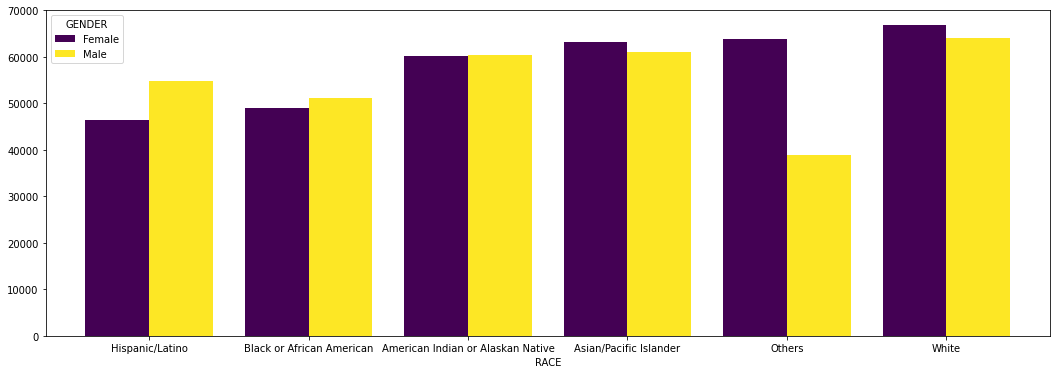

In [100]:
fig, ax = plt.subplots(figsize=(18, 6))
(employee
 .groupby(['RACE', 'GENDER'], sort=False)
 ['BASE_SALARY']
 .mean()
 .unstack('GENDER')
 .sort_values('Female')
 .plot.bar(rot=0, ax=ax, width=.8, cmap='viridis')
)

A box plot is another plot that both seaborn and pandas have in common

<AxesSubplot:xlabel='GENDER', ylabel='BASE_SALARY'>

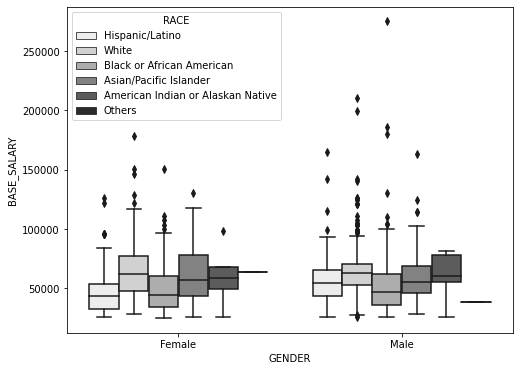

In [101]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='GENDER', y='BASE_SALARY', data=employee, hue='RACE', palette='Greys', ax=ax)

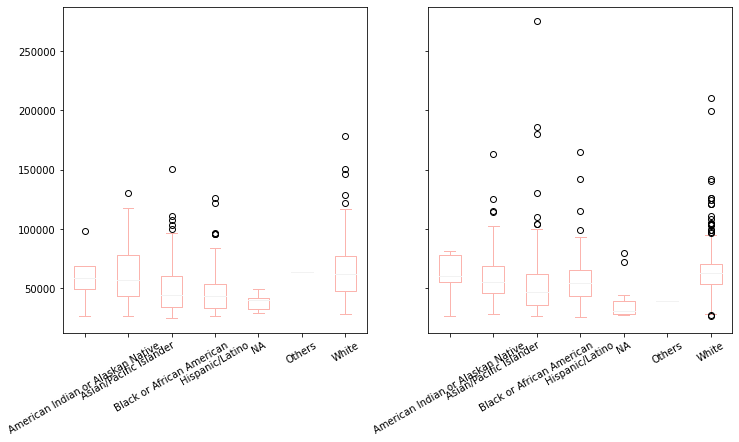

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
for g, ax in zip(['Female', 'Male'], axs):
    (employee
     .query('GENDER == @g')
     .assign(RACE=lambda df_: df_.RACE.fillna('NA'))
     .pivot(columns='RACE')
     ['BASE_SALARY']
     .plot.box(ax=ax, rot=30, cmap='Pastel1')
    )

#### Multivariate analysis with Seaborn 

In [103]:
def yrs_exp(df_):
    days_hired = pd.to_datetime('12-1-2016') - df_.HIRE_DATE
    return days_hired.dt.days / 365.25

In [104]:
emp = (employee
       .assign(YEARS_EXPERIENCE=yrs_exp))
emp[['HIRE_DATE', 'YEARS_EXPERIENCE']]

,HIRE_DATE,YEARS_EXPERIENCE
0,2006-06-12,10.472279
1,2000-07-19,16.369610
2,2015-02-03,1.826146
3,1982-02-08,34.811773
4,1989-06-19,27.452430
...,...,...
1995,2014-06-09,2.480493
1996,2003-09-02,13.248460
1997,2014-10-13,2.135524
1998,2009-01-20,7.863107


Let's create a scatterplot between years of experience and salary

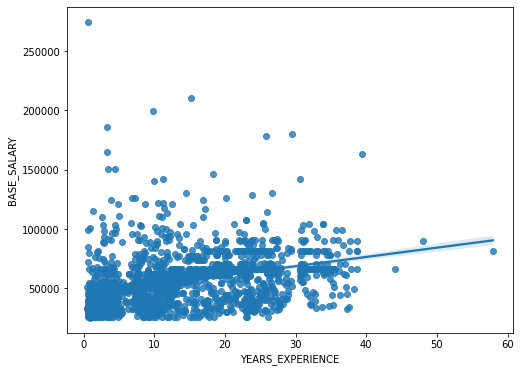

In [105]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x='YEARS_EXPERIENCE', y='BASE_SALARY', data=emp, ax=ax)
fig.savefig('./images/c13-scat4.png', dpi=300, bbox_inches='tight')

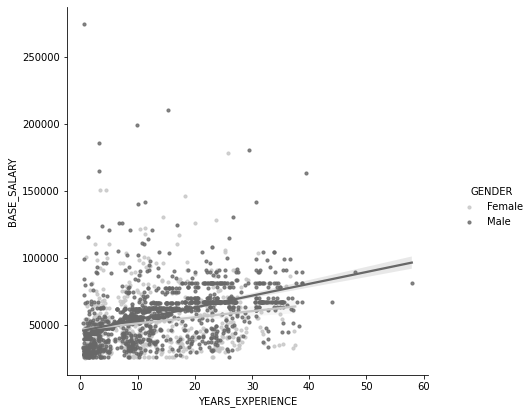

In [106]:
grid = sns.lmplot(x='YEARS_EXPERIENCE', 
                  y='BASE_SALARY', 
                  hue='GENDER', palette='Greys', scatter_kws={'s':10}, data=emp)
grid.fig.set_size_inches(8, 6)
grid.fig.savefig('./images/c13-scat5.png', dpi=300, bbox_inches='tight')

/Users/luis/anaconda3/envs/nlu/lib/python3.7/site-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


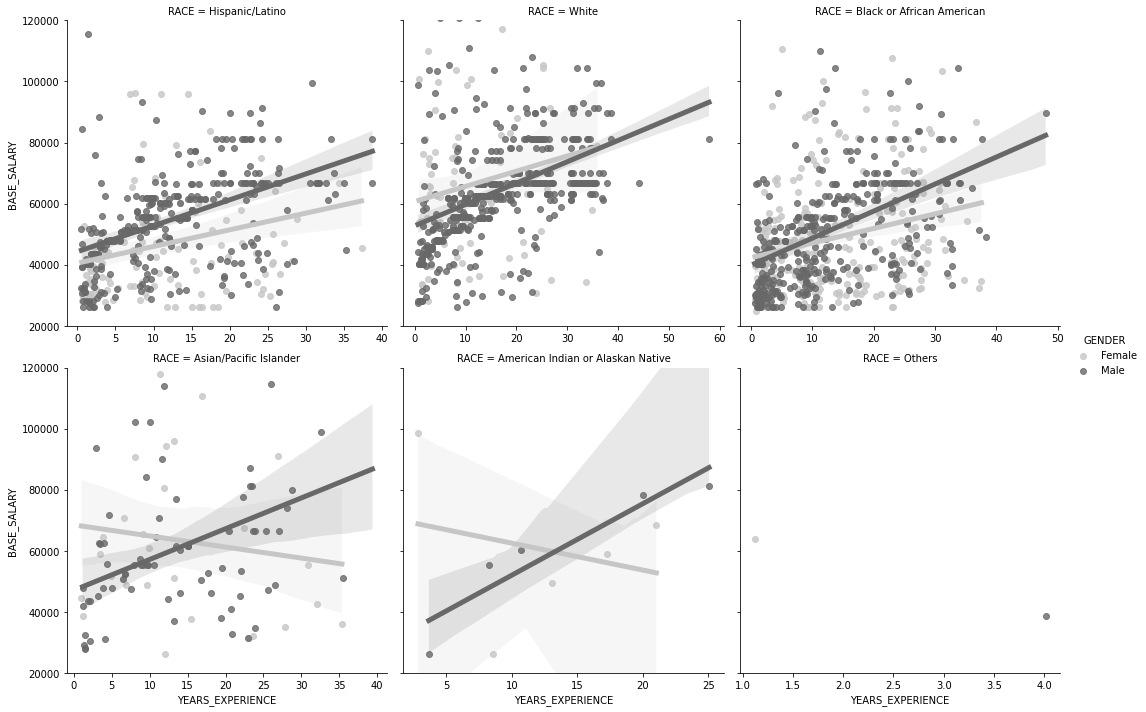

In [107]:
grid = sns.lmplot(x='YEARS_EXPERIENCE', 
                  y='BASE_SALARY', 
                  hue='GENDER', col='RACE', col_wrap=3, 
                  palette='Greys', sharex=False,
                  line_kws={'linewidth': 5},
                  data=emp
                 )
grid.set(ylim=(20000, 120000))
grid.fig.savefig('./images/c13-scat6.png', dpi=300, bbox_inches='tight')